# `plotting`
> Utility Functions that can be used to manage colors and other plotting tools. Includes all stable utility functions.

In [ ]:
#|default_exp plotting

In [ ]:
#hide
from nbdev import show_doc, nbdev_export

In [ ]:
#| export
from __future__ import annotations
from collections import OrderedDict
from itertools import combinations

import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
#| export
cmaps = OrderedDict()

cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']
cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

In [ ]:
#| export
def plot_cmap_collections(
    cmap_collections:str|list(str) = None  # list of color map collections to display (from cmaps.keys())
                         )-> None :
    """Plot all color maps in the collections passed as cmap_collections"""
    if cmap_collections is None: cmap_collections = cmaps.keys()
    cmap_lists = [cmap_list for cmap_cat, cmap_list in cmaps.items() if cmap_cat in cmap_collections]
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))

    def plot_color_gradients(cmap_category, cmap_list, nrows):
        fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(8, nrows * 0.3))
        fig.subplots_adjust(top=0.75, bottom=0.01, left=0.2, right=0.99)
        axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

        for ax, name in zip(axes, cmap_list):
            ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
            pos = list(ax.get_position().bounds)
            x_text = pos[0] - 0.01
            y_text = pos[1] + pos[3]/2.
            fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

        # Turn off *all* ticks & spines, not just the ones with colormaps.
        for ax in axes:
            ax.set_axis_off()

    for cmap_category, cmap_list in zip(cmap_collections, cmap_lists):
        n_color_bars = len(cmap_list)
        plot_color_gradients(cmap_category, cmap_list, n_color_bars)

    plt.show()

In [ ]:
show_doc(plot_cmap_collections)

---

[source](https://github.com/vtecftwy/ecutils/blob/master/ecutils/plotting.py#L42){target="_blank" style="float:right; font-size:smaller"}

### plot_cmap_collections



Plot all color maps in the collections passed as cmap_collections

The following color map collections are defined:

In [ ]:
#|echo: false
for k in cmaps.keys():
    print('-',k)

- Perceptually Uniform Sequential
- Sequential
- Diverging
- Sequential (2)
- Cyclic
- Qualitative
- Miscellaneous


`plot_cmap_collections` will plot a color bar for each color map in the selected collections

A single collection

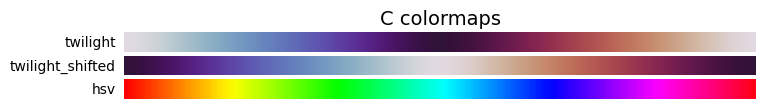

In [ ]:
plot_cmap_collections('Cyclic')

Several collections

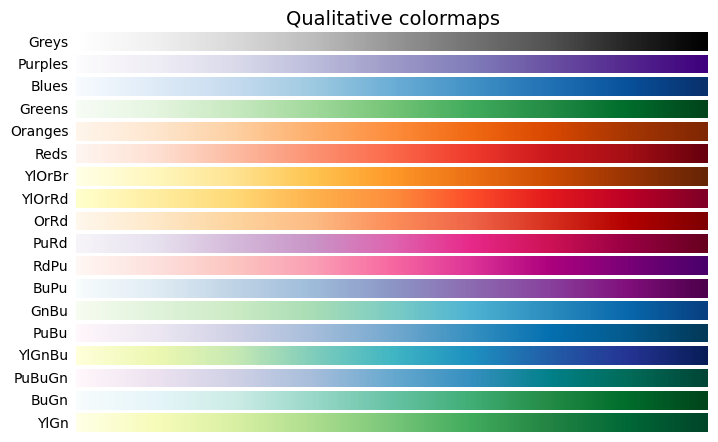

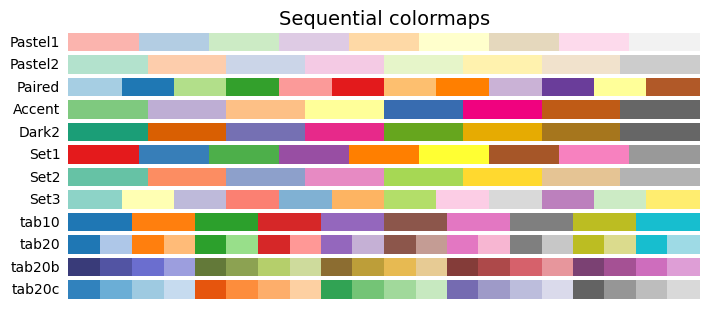

In [ ]:
plot_cmap_collections(['Qualitative', 'Sequential'])

All the collections

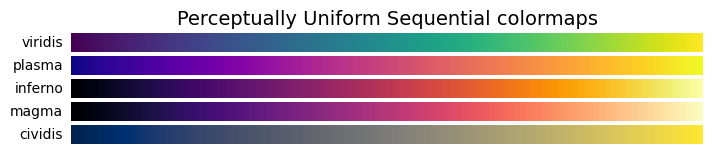

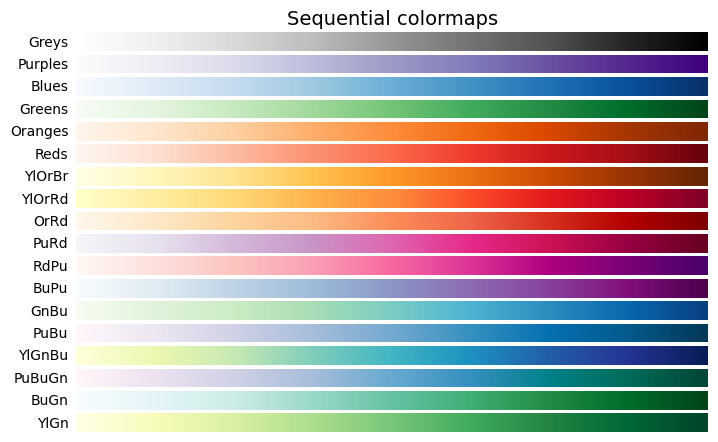

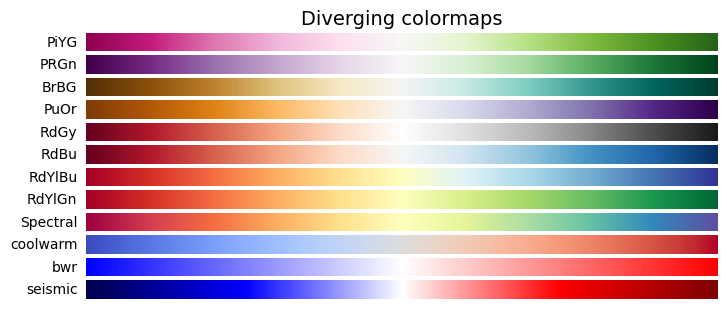

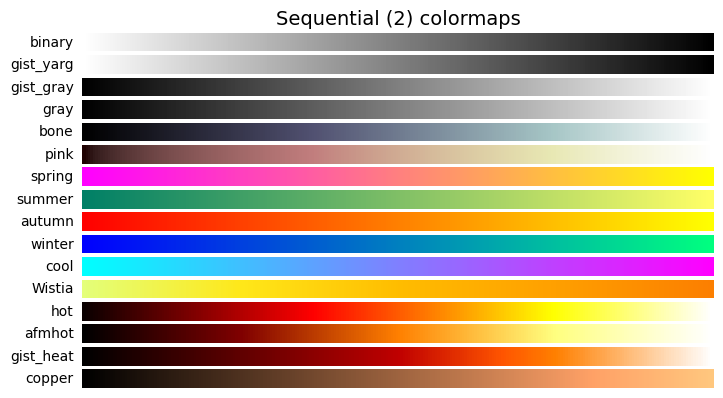

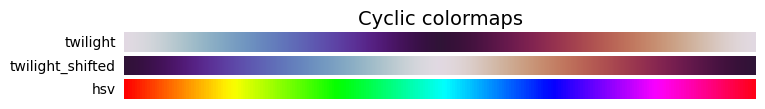

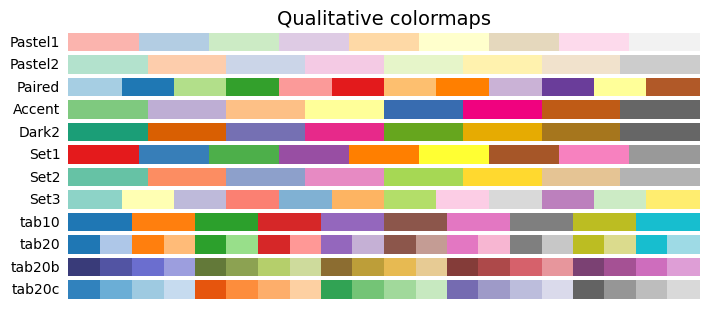

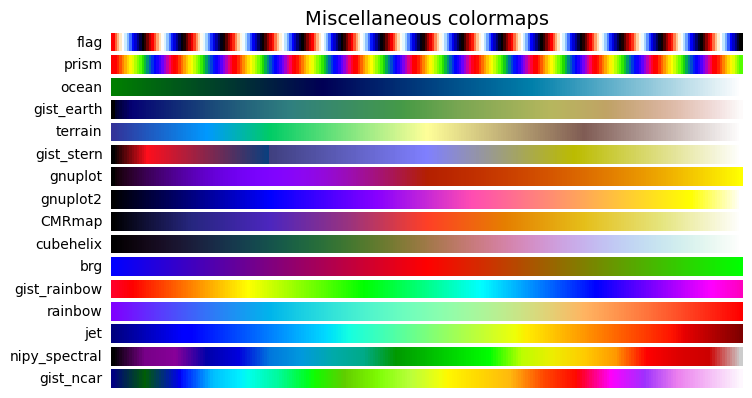

In [ ]:
plot_cmap_collections()

In [ ]:
#| export
def plot_color_bar(cmap:str,                        # string name of one of the cmaps 
                   series:list(int|float) = None    # series of numerical values to show for each color
                  ):
    """Plots a color bar with value overlay"""
    if series is None: series = range(10)
    n_elements = len(series)
    gradient = np.linspace(0, 1, n_elements)
    gradient = np.vstack((gradient, gradient))
    _, ax = plt.subplots(figsize=(min(n_elements, 18),1))
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(cmap))
    for i, val in enumerate(series):
        ax.text(i, .7, str(val), color='#ffffff', fontsize='medium', fontweight=500, horizontalalignment='center')

    ax.set_xticks(series)
    ax.set_axis_off()
    plt.show()

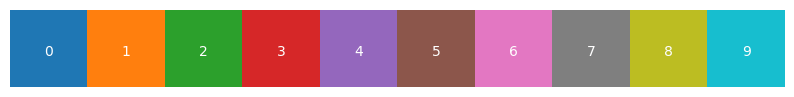

In [ ]:
plot_color_bar('tab10', range(10))

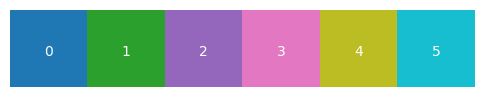

In [ ]:
plot_color_bar('tab10', series=range(6))

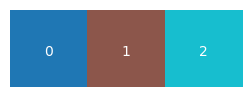

In [ ]:
plot_color_bar('tab10', series=[0, 1, 2])

In [ ]:
#| export
def get_color_mapper(
    series:list(int|float),    # series of values to map to colors  
    cmap:str = 'tab10'         # name of the cmap to use
):
    """Return color mapper based on a color map and a series of values"""
    minimum, maximum = min(series), max(series)
    norm = colors.Normalize(vmin=minimum, vmax=maximum, clip=True)
    return cm.ScalarMappable(norm=norm, cmap=cm.get_cmap(cmap))

## Usage

This function is used to assure coherent colors for different plots.
1. Define a color mapper based on values and cmap: `clr_mapper = get_color_mapper([1, 2, 3, 4], cmap='Paired)`
2. Call the color mapper and have it return the appropriate values for a plot: `clr_mapper.to_rgba(2)`


Example

We have dataset with several features. 
1. We cluster the data into 10 clusters and show two of the features clustered (first plot)
2. We want to show how other features in the dataset are broken down with respect to the clusters

To do that, we need to use exactly the same color between the plots. `get_color_mapper` utility function makes this easier.

In [ ]:
#| hide
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_blobs

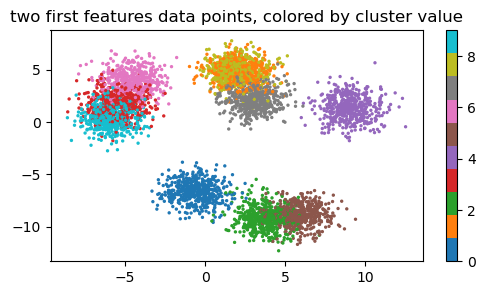

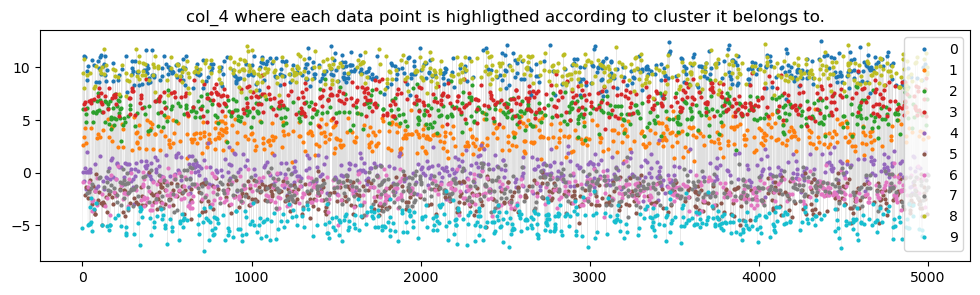

In [ ]:
n_feats = 6
col_list = [f"col_{i}" for i in range(n_feats)]
X, y = make_blobs(n_samples=5_000, n_features=n_feats, centers=10, shuffle=True)

X = pd.DataFrame(X, columns=col_list)

cmap='tab10'

clustering = KMeans(n_clusters=10)
clusters = clustering.fit_predict(X)
cluster_ids = np.unique(clusters)

clr_mapper = get_color_mapper(cluster_ids, cmap=cmap)

plt.figure(figsize=(6, 3))
plt.scatter(X.col_0, X.col_1, c=clusters, s=2, cmap=cmap)
plt.colorbar()
plt.title('two first features data points, colored by cluster value')
plt.show()

#   Plot another feature, colored according to the clustering
plt.figure(figsize=(12, 3))
featname = 'col_4'
plt.plot(X[featname], c='grey', alpha=.25, lw=0.25)
for c in cluster_ids:
    mask = y == c
    X[f"{featname}_{c}"] = X.loc[:, featname]
    X.loc[~mask, f"{featname}_{c}"] = np.nan
    plt.plot(X[f"{featname}_{c}"], label=str(c), c=clr_mapper.to_rgba(c), lw=0, marker='o', markersize=2)
plt.title(f'{featname} where each data point is highligthed according to cluster it belongs to.')
plt.legend()
plt.show()

In [ ]:
#| export
def plot_feature_scatter(
    X:np.array,              # data used to create plots
    y:np.array|None = None,  # target values
    n_plots:int = 2,         # number of scatter plots to create
    axes_per_row:int = 3,    # number of nbr of scatter plots per row
    axes_size:int = 5        # size of one scatter plot (square)
    ):
    """Plots n_plots scatter plots of random combinations of two features out of X"""

    if y is None: y = np.ones(shape=(X.shape[0],))
    pairs = np.array(list(combinations(range(X.shape[1]), 2)))
    idxs = np.random.randint(pairs.shape[0], size=n_plots)
    
    ncols = axes_per_row
    nrows = n_plots // axes_per_row + (1 if n_plots % axes_per_row > 0 else 0)
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*axes_size, nrows*axes_size))
    for (d1, d2), ax in zip(pairs[idxs, :], axs.reshape(ncols * nrows)):
        ax.scatter(X[:, d1], X[:, d2], c=y)
        ax.set_title(f"X_{min(d1, d2)} and X_{max(d1, d2)}")
        ax.set_xlabel(f"X_{d1}")
        ax.set_ylabel(f"X_{d2}")
    
    plt.show()

Randomly selects `n_plots` pairs out of all possible combinations of features pairs for the dataset X.

X, y:           the dataset. X.shape[1] is used to set the total number of features
n_plots:        the number of feature pairs to plot as a scatter plot
axes_per_row:   the number of axes per row to plot. number of rows will be calculated accordingly
                default value is 3 axes per row
axes_size:      the size of one axes. figsize will be (ncols * axes_size, nrows * axes_size)
                default value is 5

In [ ]:
X.shape

(5000, 16)

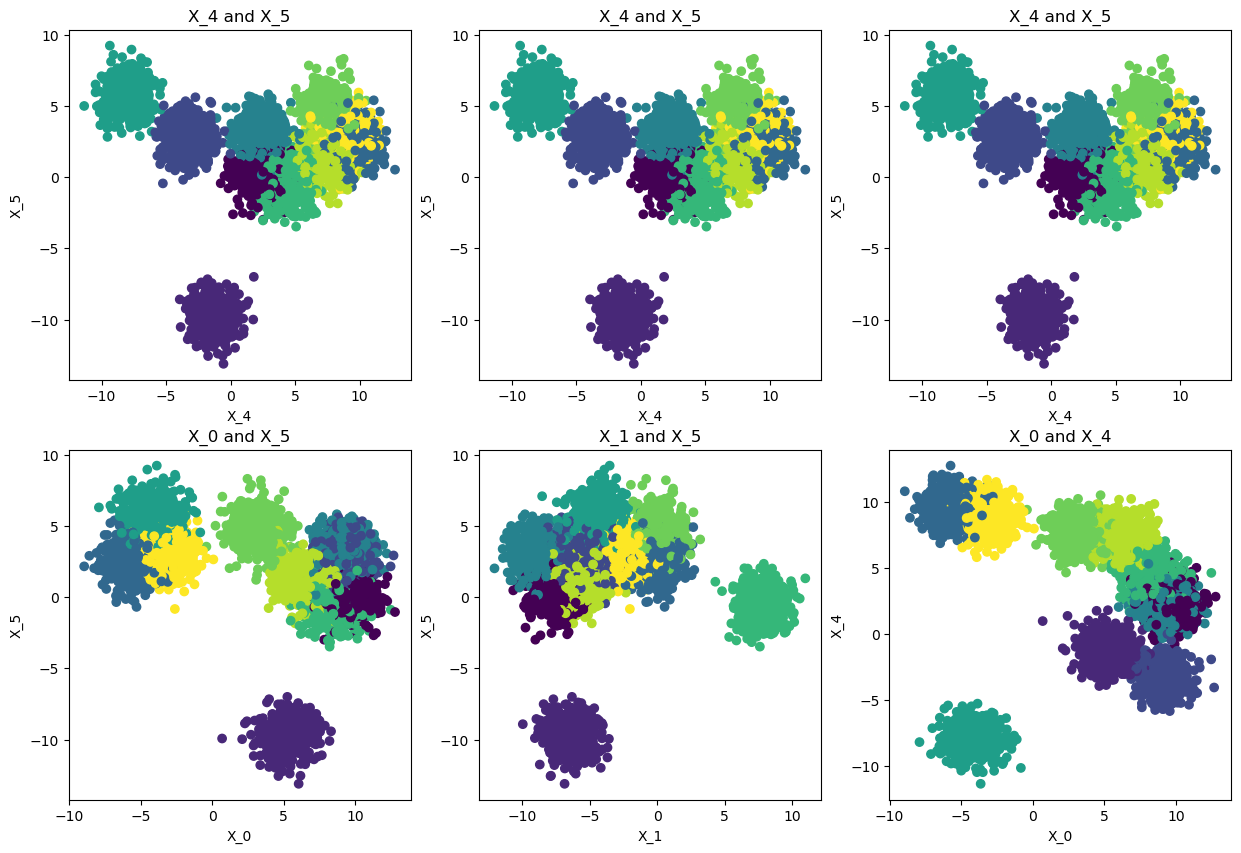

In [ ]:
n_feats = 6
col_list = [f"col_{i}" for i in range(n_feats)]
X, y = make_blobs(n_samples=5_000, n_features=n_feats, centers=10, shuffle=True)

X = pd.DataFrame(X, columns=col_list)

plot_feature_scatter(X.values, y, n_plots=6, axes_per_row=3, axes_size=5)

When not value is available for y, it is set to 1 by default

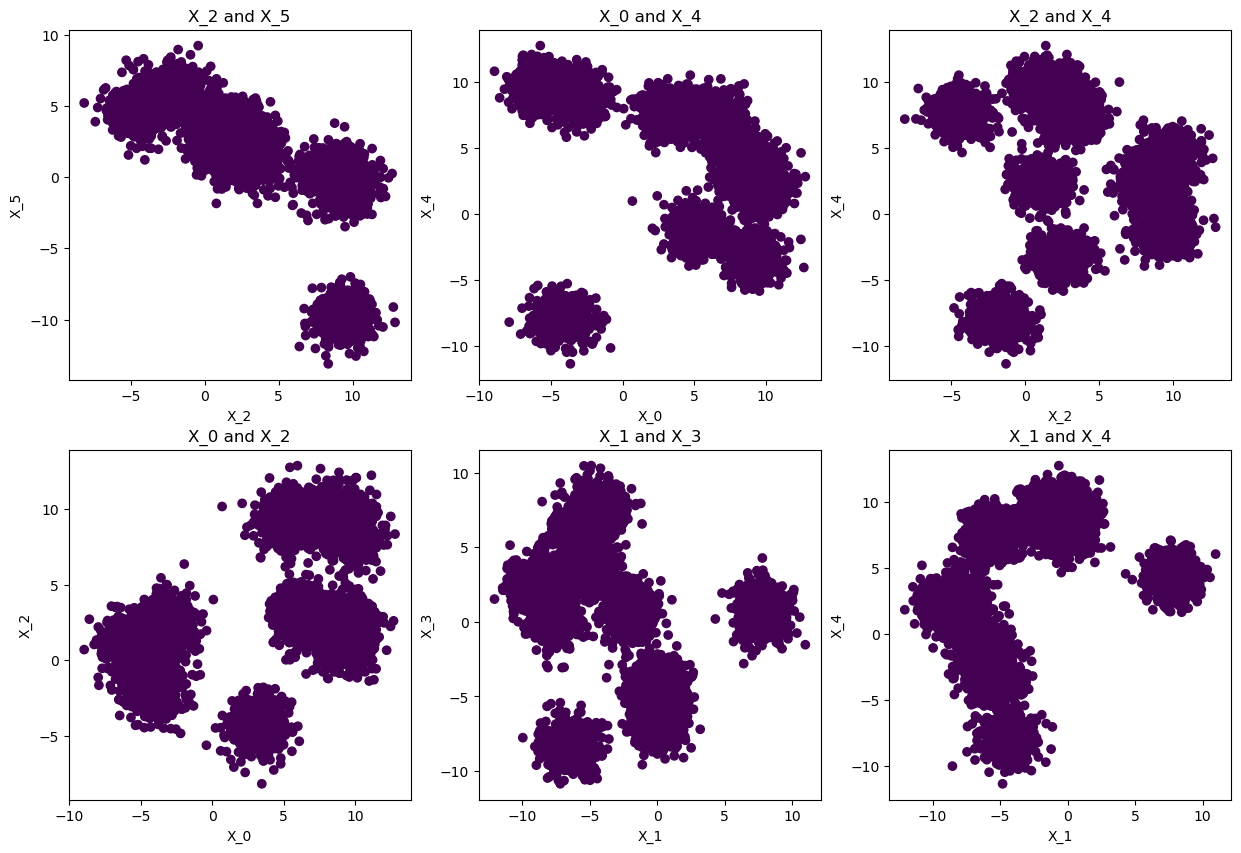

In [ ]:
plot_feature_scatter(X.values, n_plots=6, axes_per_row=3, axes_size=5)

In [ ]:
#| hide
nbdev_export()